Python Libraries Used

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from matplotlib.cm import get_cmap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler


In [9]:
df= pd.read_csv(r"C:\Users\MostafaShehab\Desktop\Machine Learning\ML Project\mydata.csv")
df.drop("time", axis=1, inplace=True)
Features = df.drop("accident_severity", axis=1)  
Y = df["accident_severity"]
label_encoder = LabelEncoder()
TargetVariable = label_encoder.fit_transform(df["accident_severity"])
#--------------------------------------------------------------------------------------------------------------------------
unique_labels = label_encoder.classes_
numeric_values = label_encoder.transform(unique_labels)
# Print the categorical values along with their corresponding numeric values
for label, numeric_value in zip(unique_labels, numeric_values):
    print(f"{label}: {numeric_value}")


Fatal: 0
Serious: 1
Slight: 2


To classify the severity of accidents, the "accident_severity" column provides crucial information regarding the outcome of each accident. This variable typically contains categorical values that indicate different levels of severity, such as "Fatal," "Slight," and "Serious." By analyzing the patterns and relationships between the accident features and the corresponding severity levels, we can develop a predictive model that accurately classifies the severity of future accidents.

# Comparison between models without diagnostics

In [41]:
def knn(Features, TargetVariable):
    knn = KNeighborsClassifier()
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.30, random_state=42)
    knn.fit(training_set_x, training_set_y)
    y_pred = knn.predict(testing_set_x)
    classification_score = accuracy_score(testing_set_y, y_pred)
    return classification_score

def naive(Features, TargetVariable):
    naive_bayes = GaussianNB()
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.30, random_state=42)
    naive_bayes.fit(training_set_x, training_set_y)
    y_pred = naive_bayes.predict(testing_set_x)
    classification_score = accuracy_score(testing_set_y, y_pred)
    return classification_score

def logistic_regression(Features, TargetVariable):
    logistic_regression = LogisticRegression()
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.30, random_state=42)
    logistic_regression.fit(training_set_x, training_set_y)
    y_pred = logistic_regression.predict(testing_set_x)
    classification_score = accuracy_score(testing_set_y, y_pred)
    return classification_score

def neural_networks(Features, TargetVariable):
    neural_networks = MLPClassifier()
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.30, random_state=42)
    neural_networks.fit(training_set_x, training_set_y)
    y_pred = neural_networks.predict(testing_set_x)
    classification_score = accuracy_score(testing_set_y, y_pred)
    return classification_score





In [7]:
knn(Features,TargetVariable)

0.8247435671261877

In [8]:
naive(Features, TargetVariable)

0.7371153506892815

In [9]:
logistic_regression(Features, TargetVariable)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8472491746263767

In [10]:
neural_networks(Features, TargetVariable)

0.846543511681242

# Results:
* The classification models were evaluated using four different algorithms: KNN, Naive Bayes, Logistic Regression, and Neural Network. The accuracies achieved by these models are as follows: KNN - 83%, Naive Bayes - 73%, Logistic Regression - 85%, and Neural Network - 85%.

* Among the four models, Naive Bayes yielded the lowest accuracy. This can be attributed to the model's difficulty in capturing complex relationships between features, especially when they are interdependent. It is worth noting that the accuracy of Naive Bayes improved from 46% to 73% after normalizing some columns, indicating its sensitivity to normalization techniques.

* KNN, Logistic Regression, and Neural Network displayed comparable performances, obtaining accuracies around 84%. When the relationship between the features and the target variable is roughly linear, the well-known linear classifier logistic regression performs well.

* Neural Networks, on the other hand, are powerful models capable of identifying intricate patterns and correlations within data. Their ability to detect complex relationships makes them suitable for capturing nuanced information and achieving high accuracy.

* KNN, known for its simplicity, is a robust classification method that excels in capturing local patterns within the dataset. By considering the neighboring instances, KNN is able to make accurate predictions based on the local characteristics of the data.

------------------------------------------------------------------------------------------------------------------------------

# Comparison between models with diagnostics

# Kfold - KNN

In [31]:
def knn_Kfold_validation(X,Y):
    #cv=50 ...> K Value = 50
    classifier_method = KNeighborsClassifier()
    scores = cross_val_score(classifier_method, X, Y, cv=50)
    # Print the accuracy for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")    
    # Calculate the Mean Accuracy
    classification_score = scores.mean()
    print("Accuracy:", classification_score)


In [32]:
knn_Kfold_validation(Features,TargetVariable)

Fold 1 Accuracy: 0.8371126228269086
Fold 2 Accuracy: 0.8197278911564626
Fold 3 Accuracy: 0.8337112622826909
Fold 4 Accuracy: 0.8030990173847317
Fold 5 Accuracy: 0.8382464096749811
Fold 6 Accuracy: 0.8216175359032502
Fold 7 Accuracy: 0.8352229780801209
Fold 8 Accuracy: 0.8321995464852607
Fold 9 Accuracy: 0.8246409674981103
Fold 10 Accuracy: 0.8053665910808768
Fold 11 Accuracy: 0.8269085411942555
Fold 12 Accuracy: 0.8284202569916855
Fold 13 Accuracy: 0.8253968253968254
Fold 14 Accuracy: 0.8136105860113422
Fold 15 Accuracy: 0.8431001890359168
Fold 16 Accuracy: 0.8362948960302458
Fold 17 Accuracy: 0.819281663516068
Fold 18 Accuracy: 0.8310018903591683
Fold 19 Accuracy: 0.8245746691871455
Fold 20 Accuracy: 0.8291115311909263
Fold 21 Accuracy: 0.8283553875236295
Fold 22 Accuracy: 0.8173913043478261
Fold 23 Accuracy: 0.8340264650283554
Fold 24 Accuracy: 0.8238185255198488
Fold 25 Accuracy: 0.8215500945179585
Fold 26 Accuracy: 0.8260869565217391
Fold 27 Accuracy: 0.8215500945179585
Fold 28 Acc

# Kfold - Naive  Bay

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

def Naive_Kfold_validation(X, Y):
    #cv=50 ...> K Value = 50
    classifier_method = GaussianNB()
    scores = cross_val_score(classifier_method, X, Y, cv=50)
    # Print the accuracy for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")    
    # Calculate and Print the Mean Accuracy
    classification_score = scores.mean()
    print("Accuracy:", classification_score)


In [34]:
Naive_Kfold_validation(Features, TargetVariable)

Fold 1 Accuracy: 0.8458049886621315
Fold 2 Accuracy: 0.8458049886621315
Fold 3 Accuracy: 0.8337112622826909
Fold 4 Accuracy: 0.8416477702191988
Fold 5 Accuracy: 0.8469387755102041
Fold 6 Accuracy: 0.8427815570672713
Fold 7 Accuracy: 0.8442932728647015
Fold 8 Accuracy: 0.8325774754346182
Fold 9 Accuracy: 0.717687074829932
Fold 10 Accuracy: 0.7426303854875284
Fold 11 Accuracy: 0.7120181405895691
Fold 12 Accuracy: 0.8563869992441421
Fold 13 Accuracy: 0.7917611489040061
Fold 14 Accuracy: 0.6525519848771266
Fold 15 Accuracy: 0.7130434782608696
Fold 16 Accuracy: 0.6574669187145558
Fold 17 Accuracy: 0.6854442344045368
Fold 18 Accuracy: 0.7550094517958412
Fold 19 Accuracy: 0.7353497164461248
Fold 20 Accuracy: 0.7315689981096408
Fold 21 Accuracy: 0.8139886578449905
Fold 22 Accuracy: 0.8389413988657844
Fold 23 Accuracy: 0.722117202268431
Fold 24 Accuracy: 0.6827977315689981
Fold 25 Accuracy: 0.57882797731569
Fold 26 Accuracy: 0.6911153119092628
Fold 27 Accuracy: 0.6827977315689981
Fold 28 Accura

# Kfold - Logistic Regression

In [35]:
def logistic_Kfold_validation(X, Y):
    #cv=50 ...> K Value = 50
    classifier_method = LogisticRegression()
    scores = cross_val_score(classifier_method, X, Y, cv=50)
    # Print the accuracy for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
    # Calculate and Print the Mean Accuracy
    classification_score = scores.mean()
    print("Accuracy:", classification_score)

In [36]:
logistic_Kfold_validation(Features,TargetVariable)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 Accuracy: 0.8499622071050642
Fold 2 Accuracy: 0.8499622071050642
Fold 3 Accuracy: 0.8499622071050642
Fold 4 Accuracy: 0.8499622071050642
Fold 5 Accuracy: 0.8495842781557067
Fold 6 Accuracy: 0.8495842781557067
Fold 7 Accuracy: 0.8495842781557067
Fold 8 Accuracy: 0.8495842781557067
Fold 9 Accuracy: 0.8495842781557067
Fold 10 Accuracy: 0.8495842781557067
Fold 11 Accuracy: 0.8495842781557067
Fold 12 Accuracy: 0.8495842781557067
Fold 13 Accuracy: 0.8495842781557067
Fold 14 Accuracy: 0.8499054820415879
Fold 15 Accuracy: 0.8499054820415879
Fold 16 Accuracy: 0.8499054820415879
Fold 17 Accuracy: 0.8499054820415879
Fold 18 Accuracy: 0.8499054820415879
Fold 19 Accuracy: 0.8499054820415879
Fold 20 Accuracy: 0.8499054820415879
Fold 21 Accuracy: 0.8499054820415879
Fold 22 Accuracy: 0.8499054820415879
Fold 23 Accuracy: 0.8499054820415879
Fold 24 Accuracy: 0.8499054820415879
Fold 25 Accuracy: 0.8499054820415879
Fold 26 Accuracy: 0.8499054820415879
Fold 27 Accuracy: 0.8499054820415879
Fold 28 Ac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Kfold - Neural  Network

In [39]:
def Network_Kfold_validation(X, Y):
    #cv=10 ...> K Value = 10 since TOTAL NO. of ITERATIONS REACHED LIMIT when k=50
    classifier_method = MLPClassifier()
    scores = cross_val_score(classifier_method, X, Y, cv=10)
    # Print the accuracy for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
    # Calculate and Print the Mean Accuracy
    classification_score = scores.mean()
    print("Accuracy:", classification_score)


In [40]:
Network_Kfold_validation(Features,TargetVariable)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neur

Fold 1 Accuracy: 0.8501549860134573
Fold 2 Accuracy: 0.8495501625463068
Fold 3 Accuracy: 0.8492477508127315
Fold 4 Accuracy: 0.849841221835778
Fold 5 Accuracy: 0.849841221835778
Fold 6 Accuracy: 0.849841221835778
Fold 7 Accuracy: 0.849841221835778
Fold 8 Accuracy: 0.849841221835778
Fold 9 Accuracy: 0.849841221835778
Fold 10 Accuracy: 0.849841221835778
Accuracy: 0.8497841452222941


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# Results:
* The classification models' accuracies after k-fold cross-validation are as follows: KNN 83%, Naive Bayes 70%, Logistic Regression 85%, and Neural Network 85%.

* The results reveal that KNN, Logistic Regression, and Neural Network perform consistently well on the dataset, whereas Naive Bayes performs marginally worse. The effect of k-fold cross-validation on model performance varied, with some models being more robust to the cross-validation process's modifications.


------------------------------------------------------------------------------------------------------------------------------

# Stratified Sampling - KNN

In [42]:
def knn_stratified_sampling(Features, TargetVariable):
    classifier = KNeighborsClassifier()
    classification_score = []
#Due to compuatation Time ...> range(2)
    for _ in range(2):
        # Perform stratified sampling
        training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.3, stratify=TargetVariable)

        # Fit the classifier on the training data
        classifier.fit(training_set_x, training_set_y)

        # Evaluate the classifier on the test set
        accuracy = classifier.score(testing_set_x, testing_set_y)
        classification_score.append(accuracy)

    # Calculate and Print the Mean Accuracy
    classification_score = np.mean(classification_score) 
    print("Average Accuracy:", classification_score)

In [43]:
knn_stratified_sampling(Features,TargetVariable)

Average Accuracy: 0.8263817132488218


# Stratified Sampling - Naive Bay

In [44]:
def Naive_stratified_sampling(Features, TargetVariable):
    classifier = GaussianNB()
    classification_score = []

    for _ in range(10):
        # Perform stratified sampling
        training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.2, stratify=TargetVariable)

        # Fit the classifier on the training data
        classifier.fit(training_set_x, training_set_y)

        # Evaluate the classifier on the test set
        accuracy = classifier.score(testing_set_x, testing_set_y)
        classification_score.append(accuracy)

    # Calculate and print the average accuracy
    classification_score = np.mean(classification_score) 
    print("Average Accuracy:", classification_score)


In [45]:
Naive_stratified_sampling(Features, TargetVariable)


Average Accuracy: 0.6295089403848335


# Stratified Sampling - Logistic Regression

In [46]:
def LogisticRegression_stratified_sampling(Features, TargetVariable):
    classifier = LogisticRegression()
    classification_score = []

    for _ in range(10):
        # Perform stratified sampling
        training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.2, stratify=TargetVariable)

        # Fit the classifier on the training data
        classifier.fit(training_set_x, training_set_y)

        # Evaluate the classifier on the test set
        accuracy = classifier.score(testing_set_x, testing_set_y)
        classification_score.append(accuracy)

    # Calculate and print the average accuracy
    classification_score = np.mean(classification_score) 
    print("Average Accuracy:", classification_score)


In [47]:
LogisticRegression_stratified_sampling(Features, TargetVariable)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Average Accuracy: 0.8498468982724077


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Stratified Sampling - Neural Network

In [50]:
def Netwok_stratified_sampling(Features, TargetVariable):
    classifier = MLPClassifier()
    classification_score = []
#Due to compuatation Time ...> range(2)
    for _ in range(2):
        # Perform stratified sampling
        training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.2, stratify=TargetVariable)

        # Fit the classifier on the training data
        classifier.fit(training_set_x, training_set_y)

        # Evaluate the classifier on the test set
        accuracy = classifier.score(testing_set_x, testing_set_y)
        classification_score.append(accuracy)

    # Calculate and print the average accuracy
    classification_score = np.mean(classification_score) 
    print("Average Accuracy:", classification_score)


In [51]:
Netwok_stratified_sampling(Features, TargetVariable)


Average Accuracy: 0.8496200808981968


# Results:
* The classification models' accuracies after applying stratified sampling cross-validation are as follows: KNN - 83%, Naive Bayes - 63%, Logistic Regression - 85%, and Neural Network - 85%.

* The accuracy of K-Nearest Neighbors (KNN) remained unchanged after applying stratified sampling cross-validation. This indicates that the local patterns within each class in the dataset are consistent throughout, and the model is already performing consistently well.

* After using stratified sampling cross-validation, the accuracy of Naive Bayes decreased from 73% to 63%. This suggests that the model's performance was affected by the stratified sampling approach. It's possible that the distribution of samples within each fold differed from the overall dataset, leading to a decrease in accuracy.

* Both logistic regression and neural networks are models known for producing consistent results on specific datasets. If the initial accuracy of logistic regression and neural network models was already close to their maximum potential, stratified sampling cross-validation may not have had a major effect on their performance. This suggests that these models were already capturing the underlying patterns and relationships within the dataset effectively.

------------------------------------------------------------------------------------------------------------------------------

# Confusion Matrix - KNN

In [71]:

def confusion_matrix_knn(Features, TargetVariable):
   
    # Split the dataset into training and testing sets
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)

    # Initialize the Naive Bayes model
    knn = KNeighborsClassifier()

    # Train the Naive Bayes model
    knn.fit(training_set_x, training_set_y)

    # Evaluate the Naive Bayes model on the test set
    y_pred = knn.predict(testing_set_x)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(testing_set_y, y_pred)
    print(confusion_mat)


    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    legend_Classfication_labels = {
    0: 'Fatal',
    1: 'Serious',
    2: 'Slight'
    }
    

    sns.heatmap(confusion_mat, annot=True, cmap="Oranges", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_Classfication_labels.items()]
    plt.legend(handles=handles, loc='upper right')
    plt.show()



[[    3    24   340]
 [   12   233  4440]
 [   29   850 27135]]


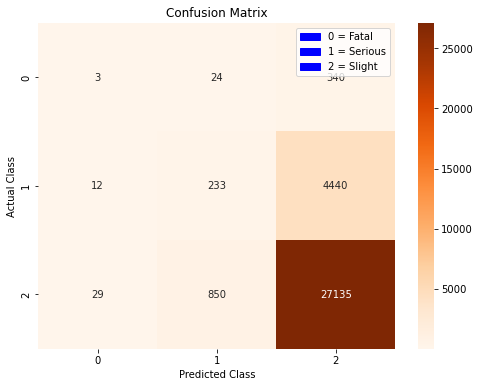

In [72]:
confusion_matrix_knn(Features, TargetVariable)


# Results
- there are 3 instances with "Fatal" that were correctly predicted, 24 instances with "Fatal" that were predicted as "Serious", and 340 instances with "Fatal" that were predicted as "Slight".

- we can see that there are 233 instances with "Serious" that were correctly predicted , 12 instances with "Serious" that were predicted as "Fatal", and 4440 instances with true label 1 that were predicted as "Slight".

- there are 27135 instances with "Slight" that were correctly predicted, 850 instances with "Slight" that were predicted as "Serious", and 29 instances with "Slight" that were predicted as "Fatal".

# Confusion Matrix - Naive Bay

In [69]:

def confusion_matrix_naive_bayes(Features, TargetVariable):
   
    # Split the dataset into training and testing sets
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)

    # Initialize the Naive Bayes model
    naive_bayes = GaussianNB()

    # Train the Naive Bayes model
    naive_bayes.fit(training_set_x, training_set_y)

    # Evaluate the Naive Bayes model on the test set
    y_pred = naive_bayes.predict(testing_set_x)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(testing_set_y, y_pred)
    print(confusion_mat)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    
    legend_Classfication_labels = {
    0: 'Fatal',
    1: 'Serious',
    2: 'Slight'
    }

    sns.heatmap(confusion_mat, annot=True, cmap="Reds", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_Classfication_labels.items()]
    plt.legend(handles=handles, loc='upper right')

    plt.show()



[[  110    42   215]
 [  668   344  3673]
 [ 2938   965 24111]]


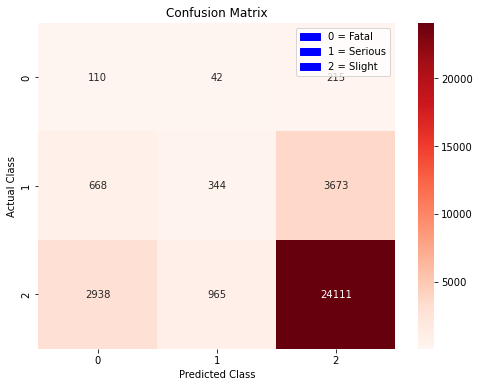

In [70]:
confusion_matrix_naive_bayes(Features, TargetVariable)


# Results
- there are 110 instances with "Fatal" that were correctly predicted, 42 instances with "Fatal" that were predicted as "Serious", and 215 instances with "Fatal" that were predicted as "Slight".

- we can see that there are 334 instances with "Serious" that were correctly predicted , 668 instances with "Serious" that were predicted as "Fatal", and 3673 instances with true label 1 that were predicted as "Slight".

- there are 24111 instances with "Slight" that were correctly predicted, 965 instances with "Slight" that were predicted as "Serious", and 2938 instances with "Slight" that were predicted as "Fatal".

# Confusion Matrix -  Logistic Regression

In [75]:

def confusion_matrix_logistic(Features, TargetVariable):
   
    # Split the dataset into training and testing sets
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)

    # Initialize the Naive Bayes model
    logistic = LogisticRegression()

    # Train the Naive Bayes model
    logistic.fit(training_set_x, training_set_y)

    # Evaluate the Naive Bayes model on the test set
    y_pred = logistic.predict(testing_set_x)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(testing_set_y, y_pred)
    print(confusion_mat)


    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    legend_Classfication_labels = {
    0: 'Fatal',
    1: 'Serious',
    2: 'Slight'
    }
    
    sns.heatmap(confusion_mat, annot=True, cmap="Purples", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_Classfication_labels.items()]
    plt.legend(handles=handles, loc='upper right')
    plt.show()



[[    0     0   367]
 [    0     0  4685]
 [    0     0 28014]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


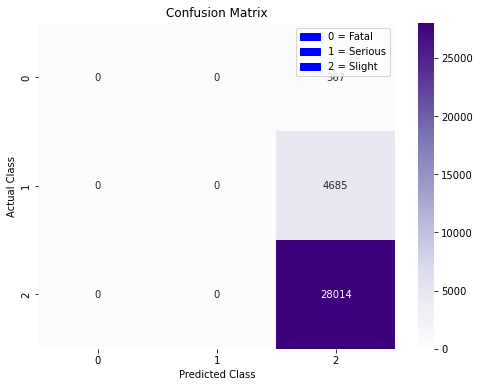

In [76]:
confusion_matrix_logistic(Features, TargetVariable)


# Results
- there are 0 instances with "Fatal" that were correctly predicted, 0 instances with "Fatal" that were predicted as "Serious", and 367 instances with "Fatal" that were predicted as "Slight".

- we can see that there are 0 instances with "Serious" that were correctly predicted , 0 instances with "Serious" that were predicted as "Fatal", and 4685 instances with true label 1 that were predicted as "Slight".

- there are 28014 instances with "Slight" that were correctly predicted, 0 instances with "Slight" that were predicted as "Serious", and 0 instances with "Slight" that were predicted as "Fatal".

# Confusion Matrix - Neural  Network

In [78]:

def confusion_matrix_network(Features, TargetVariable):
   
    # Split the dataset into training and testing sets
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)

    # Initialize the Naive Bayes model
    network = MLPClassifier()

    # Train the Naive Bayes model
    network.fit(training_set_x, training_set_y)

    # Evaluate the Naive Bayes model on the test set
    y_pred = network.predict(testing_set_x)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(testing_set_y, y_pred)
    print(confusion_mat)


    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    legend_Classfication_labels = {
    0: 'Fatal',
    1: 'Serious',
    2: 'Slight'
    }
   

    
    sns.heatmap(confusion_mat, annot=True, cmap="Greens", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_Classfication_labels.items()]
    plt.legend(handles=handles, loc='upper right')
    plt.show()



[[    0     1   366]
 [    0    13  4672]
 [    1    34 27979]]


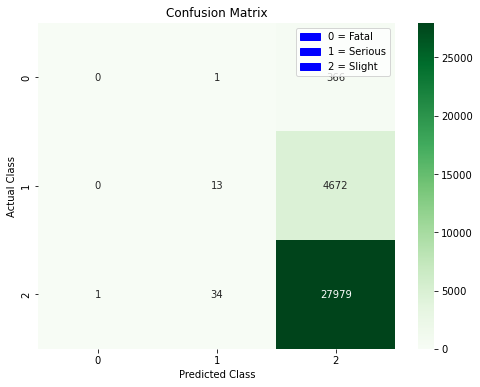

In [79]:
confusion_matrix_network(Features, TargetVariable)


# Results
- there are 0 instances with "Fatal" that were correctly predicted, 1 instances with "Fatal" that were predicted as "Serious", and 366 instances with "Fatal" that were predicted as "Slight".

- we can see that there are 13 instances with "Serious" that were correctly predicted , 0 instances with "Serious" that were predicted as "Fatal", and 4672 instances with true label 1 that were predicted as "Slight".

- there are 27979 instances with "Slight" that were correctly predicted, 34 instances with "Slight" that were predicted as "Serious", and 1 instances with "Slight" that were predicted as "Fatal".

-------------------------------------------------------------------------------------------------------------------------------

# ROC Curve - KNN

In [80]:
def plot_roc_curve_naive_knn(Features, TargetVariable):
    # Split the data into training and test sets
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    knn = KNeighborsClassifier()

    # Train the classifier
    knn.fit(training_set_x, training_set_y)

    # Predict probabilities for each class
    y_scores = knn.predict_proba(testing_set_x)

    # Binarize the target labels
    testing_set_y_bin = label_binarize(testing_set_y, classes=np.unique(TargetVariable))
    n_classes = testing_set_y_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(testing_set_y_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


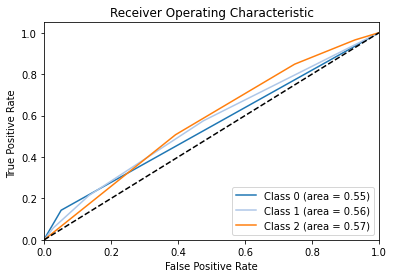

In [81]:
 plot_roc_curve_naive_knn(Features, TargetVariable)


# ROC Curve - Naive Bay

In [82]:
def plot_roc_curve_naive_bayes(Features, TargetVariable):
    # Split the data into training and test sets
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    naive_bayes = GaussianNB()

    # Train the classifier
    naive_bayes.fit(training_set_x, training_set_y)

    # Predict probabilities for each class
    y_scores = naive_bayes.predict_proba(testing_set_x)

    # Binarize the target labels
    testing_set_y_bin = label_binarize(testing_set_y, classes=np.unique(TargetVariable))
    n_classes = testing_set_y_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(testing_set_y_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


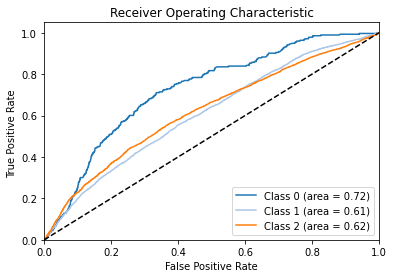

In [83]:
 plot_roc_curve_naive_bayes(Features, TargetVariable)


# ROC Curve - Logistic Regression


In [84]:
def plot_roc_curve_logistic(Features, TargetVariable):
    # Split the data into training and test sets
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    logistic = LogisticRegression()

    # Train the classifier
    logistic.fit(training_set_x, training_set_y)

    # Predict probabilities for each class
    y_scores = logistic.predict_proba(testing_set_x)

    # Binarize the target labels
    testing_set_y_bin = label_binarize(testing_set_y, classes=np.unique(TargetVariable))
    n_classes = testing_set_y_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(testing_set_y_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


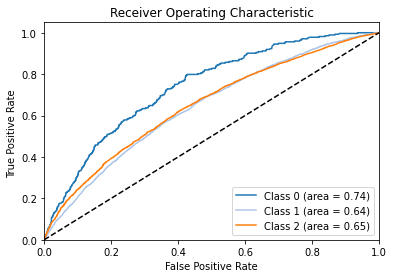

In [85]:
plot_roc_curve_logistic(Features, TargetVariable)


# ROC Curve - Neural Network

In [86]:
def plot_roc_curve_network(Features, TargetVariable):
    # Split the data into training and test sets
    training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(Features, TargetVariable, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    network = MLPClassifier()

    # Train the classifier
    network.fit(training_set_x, training_set_y)

    # Predict probabilities for each class
    y_scores = network.predict_proba(testing_set_x)

    # Binarize the target labels
    testing_set_y_bin = label_binarize(testing_set_y, classes=np.unique(TargetVariable))
    n_classes = testing_set_y_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(testing_set_y_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


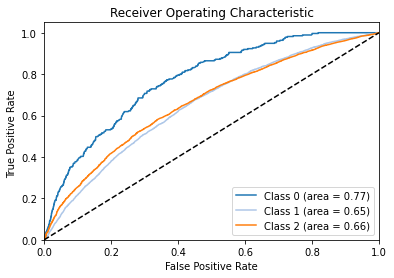

In [87]:
plot_roc_curve_network(Features, TargetVariable)


## Results

- KNN Area under the curve range from 0.55 - 0.57:
The Area Under Curve rsuggests that KNN has limited ability to separate positive and negative instances effectively.It means that the KNN algorithm might not accurately represent the distribution of classifications or the level of difficulty of the classification problem properly, resulting in poor results.

- Naive Bays Area under the curve range from 0.54 to 0.71:
Naive Bayes achieves a moderate to good level of performance in terms of separating the classes.The varying AUC range indicates that the degree of separation between classes varies across different Naive Bayes evaluation circumstances. In rare circumstances, the classes may be highly separated, resulting in larger AUC values. In other circumstances, the classes may have more overlap, resulting in lower AUC values.

- Logistic Regression Area under the curve range from 0.64 to 0.70:
The relatively narrow AUC range shows that the discriminative effectiveness of Logistic Regression is reasonably consistent across many evaluation conditions. The fact that the AUC values are reasonably close to one another suggests that the classifier's performance is robust.

- Neural Network Area under the curve range from 0.65 to 0.70:
Performs considerably well in distinguishing between positive and negative instances.Shows best results



# Learning Curve 

In [95]:
def plot_learning_curves(Features, TargetVariable, model):
    train_sizes, train_scores, test_scores = learning_curve(model, Features, TargetVariable, cv=2, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.001, 1.0, 20))

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Learning Curve - KNN

In [ ]:
#Convergence not reached. 
Best data size cannot be determined.
model = KNeighborsClassifier()
plot_learning_curves(Features, TargetVariable, model)

# Learning Curve - Naive Bays

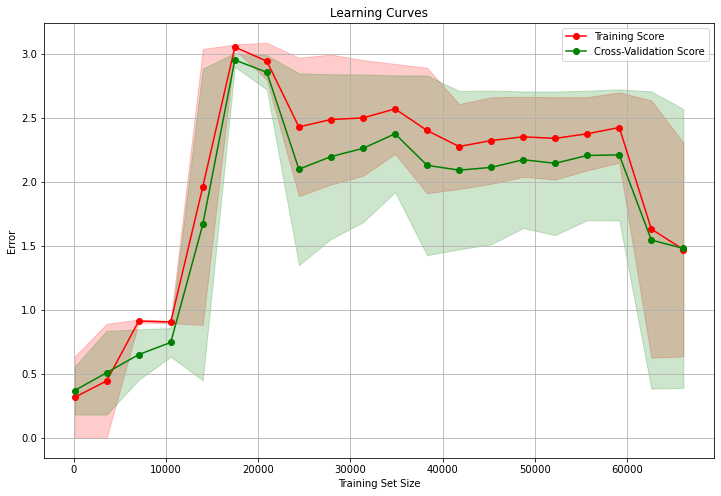

In [96]:
model = GaussianNB()
plot_learning_curves(Features, TargetVariable, model)

# Learning Curve - logistic Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

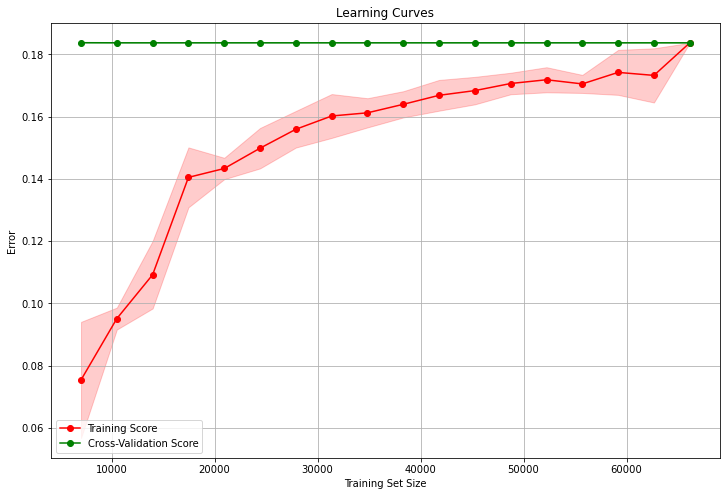

In [97]:
model = LogisticRegression()
plot_learning_curves(Features, TargetVariable, model)

# Learning Curve - Neural Network

In [94]:
# Convergence not reached.
Best data size cannot be determined.
model = MLPClassifier()
plot_learning_curves(Features, TargetVariable, model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramDa

# Regression
Among the classifiers you mentioned (KNN, Naive Bayes, Logistic Regression, Neural Networks), the ones that commonly support regularization are Logistic Regression and Neural Networks. Regularization techniques are often applied in these models to prevent overfitting and improve generalization.



In [13]:
def logistic_regression_with_regularization(Features, TargetVariabley, lambda_values):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for lambda_val in lambda_values:
        # Create and train the logistic regression model with different lambda values
        C = 1 / lambda_val
        logistic_regression = LogisticRegression(penalty='l2', C=C)
        logistic_regression.fit(X_train_scaled, y_train)

        # Evaluate the model on the test set
        y_pred = logistic_regression.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Lambda: {lambda_val}, Accuracy: {accuracy}")


In [14]:
lambda_values = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12, 10.24]

logistic_regression_with_regularization(Features,TargetVariable,lambda_values)


Lambda: 0.01, Accuracy: 0.8482969795486335
Lambda: 0.02, Accuracy: 0.8482969795486335
Lambda: 0.04, Accuracy: 0.8482969795486335
Lambda: 0.08, Accuracy: 0.8482969795486335
Lambda: 0.16, Accuracy: 0.8482969795486335
Lambda: 0.32, Accuracy: 0.8482969795486335
Lambda: 0.64, Accuracy: 0.8482969795486335
Lambda: 1.28, Accuracy: 0.8482969795486335
Lambda: 2.56, Accuracy: 0.8482969795486335
Lambda: 5.12, Accuracy: 0.8482969795486335
Lambda: 10.24, Accuracy: 0.8482969795486335


- It seems that all the lambda values you used in the logistic regression model resulted in the same accuracy of 0.8482969795486335. This could indicate that the regularization parameter (lambda) is not having a significant impact on the model's performance in this case.


In [20]:
def neural_network_with_regularization(X, y, lambda_values):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for lambda_val in lambda_values:
        # Create a neural network model with regularization
        mlp = MLPClassifier(hidden_layer_sizes=(64, 64),
                            activation='relu',
                            solver='adam',
                            alpha=lambda_val,
                            random_state=42)

        # Train the model
        mlp.fit(X_train_scaled, y_train)

        # Evaluate the model on the test set
        accuracy = mlp.score(X_test_scaled, y_test)
        print(f"Lambda: {lambda_val}, Test Accuracy: {accuracy}")



In [21]:
lambda_values = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12, 10.24]

neural_network_with_regularization(Features,TargetVariable,lambda_values)


Lambda: 0.01, Test Accuracy: 0.8424753336105546
Lambda: 0.02, Test Accuracy: 0.8466714550334555
Lambda: 0.04, Test Accuracy: 0.8483347824443352
Lambda: 0.08, Test Accuracy: 0.8482969795486335
Lambda: 0.16, Test Accuracy: 0.8482969795486335
Lambda: 0.32, Test Accuracy: 0.8482969795486335
Lambda: 0.64, Test Accuracy: 0.8482969795486335
Lambda: 1.28, Test Accuracy: 0.8482969795486335
Lambda: 2.56, Test Accuracy: 0.8482969795486335
Lambda: 5.12, Test Accuracy: 0.8482969795486335
Lambda: 10.24, Test Accuracy: 0.8482969795486335


- Accurcy results has increased from 73% to 85% . Applying regularization techniques to your neural network model can help prevent overfitting and improve generalization performance.Regularization can be particularly effective when you have a complex neural network architecture or limited training data. It helps to control the model's complexity and prevents it from memorizing the training examples too closely.